In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [38]:
tatanic_df=pd.read_csv('Titanic.csv')

In [39]:
tatanic_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,1,3,Allison Hill,male,17,4,2,43d75413-a939-4bd1-a516-b0d47d3572cc,144.08,Q,1
1,2,1,Noah Rhodes,male,60,2,2,6334fa2a-8b4b-47e7-a451-5ae01754bf08,249.04,S,0
2,3,3,Angie Henderson,male,64,0,0,61a66444-e2af-4629-9efb-336e2f546033,50.31,Q,1
3,4,3,Daniel Wagner,male,35,4,0,0b6c03c8-721e-4419-afc3-e6495e911b91,235.20,C,1
4,5,1,Cristian Santos,female,70,0,3,436e3c49-770e-49db-b092-d40143675d58,160.17,C,1


In [40]:
tatanic_df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Survived       0
dtype: int64

In [41]:
tatanic_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,1.964000,38.458000,2.032000,2.005000,247.968650,0.492000
std,288.819436,0.820596,23.103723,1.424431,1.410306,139.301211,0.500186
min,1.000000,1.000000,1.000000,0.000000,0.000000,10.020000,0.000000
25%,250.750000,1.000000,19.000000,1.000000,1.000000,126.295000,0.000000
50%,500.500000,2.000000,36.500000,2.000000,2.000000,246.500000,0.000000
75%,750.250000,3.000000,59.000000,3.000000,3.000000,365.662500,1.000000
max,1000.000000,3.000000,79.000000,4.000000,4.000000,499.780000,1.000000


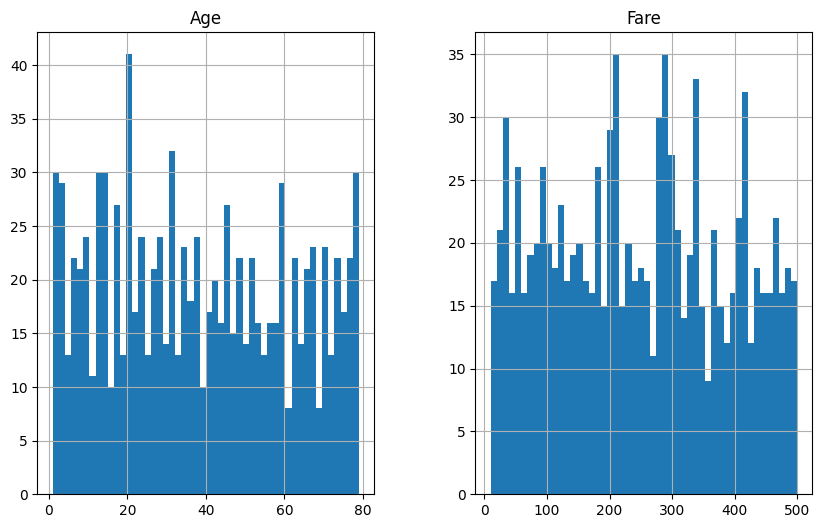

In [42]:
tatanic_df[['Age', 'Fare']].hist(bins=50, figsize=(10, 6))
plt.show()

In [43]:
print(tatanic_df['Pclass'].value_counts())
print(tatanic_df['Sex'].value_counts())
print(tatanic_df['Embarked'].value_counts())

Pclass
1    355
2    326
3    319
Name: count, dtype: int64
Sex
male      527
female    473
Name: count, dtype: int64
Embarked
Q    362
C    328
S    310
Name: count, dtype: int64


In [23]:
print(tatanic_df.describe())

       PassengerId       Pclass          Age        SibSp        Parch  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean    500.500000     1.964000    38.458000     2.032000     2.005000   
std     288.819436     0.820596    23.103723     1.424431     1.410306   
min       1.000000     1.000000     1.000000     0.000000     0.000000   
25%     250.750000     1.000000    19.000000     1.000000     1.000000   
50%     500.500000     2.000000    36.500000     2.000000     2.000000   
75%     750.250000     3.000000    59.000000     3.000000     3.000000   
max    1000.000000     3.000000    79.000000     4.000000     4.000000   

              Fare     Survived  
count  1000.000000  1000.000000  
mean    247.968650     0.492000  
std     139.301211     0.500186  
min      10.020000     0.000000  
25%     126.295000     0.000000  
50%     246.500000     0.000000  
75%     365.662500     1.000000  
max     499.780000     1.000000  


In [44]:
tatanic_df['Age'].fillna(tatanic_df['Age'].mean(), inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_16724\3723248447.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tatanic_df['Age'].fillna(tatanic_df['Age'].mean(), inplace=True)


In [45]:
tatanic_df['Sex'] = tatanic_df['Sex'].map({'male': 0, 'female': 1})
tatanic_df['Embarked'] = tatanic_df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
tatanic_df[['Age', 'Fare']] = scaler.fit_transform(tatanic_df[['Age', 'Fare']])

In [47]:
# Calculate total number of family members
tatanic_df['FamilySize'] = tatanic_df['SibSp'] + tatanic_df['Parch']

In [48]:
tatanic_df.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived,FamilySize
0,1,3,Allison Hill,0,-0.929233,4,2,43d75413-a939-4bd1-a516-b0d47d3572cc,-0.746157,1,1,6
1,2,1,Noah Rhodes,0,0.932870,2,2,6334fa2a-8b4b-47e7-a451-5ae01754bf08,0.007695,2,0,4


In [49]:
# Extract passenger title from Name column
tatanic_df['Title'] = tatanic_df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())


IndexError: list index out of range